In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all/occupancy_by_month_2021_08_30--15-08-44.csv")

/Users/elee/.pyenv/versions/3.8.11/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,provnum,year,month,provname,city,state,county_name,county_fips,cy_qtr,workdate,...,hrs_medaide_ctr,day,day_name,is_weekend,bedcert,region,market,cluster,occupancy,ensign
0,015009,2019,1,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2019Q1,2019-01-01,...,0.0,1,Tuesday,False,57,NaN,NaN,NaN,0.913978,False
1,015009,2019,2,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2019Q1,2019-02-01,...,0.0,1,Friday,False,57,NaN,NaN,NaN,0.947995,False
2,015009,2019,3,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2019Q1,2019-03-01,...,0.0,1,Friday,False,57,NaN,NaN,NaN,0.954726,False
3,015009,2019,7,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2019Q3,2019-07-01,...,0.0,1,Monday,False,57,NaN,NaN,NaN,0.891907,False
4,015009,2019,8,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2019Q3,2019-08-01,...,0.0,1,Thursday,False,57,NaN,NaN,NaN,0.946237,False


In [86]:
df_2020 = df[df['year'] == 2020]

In [5]:
df_touch = df[df['market'] == 'Touchstone 2.0']

In [11]:
df_touch = mean_occupancy(df_touch)

In [10]:
def mean_occupancy(df):
    agg_dict = dict()
    for i in df.columns:
            if i == 'provnum' or i == 'year':
                continue
            elif i == 'occupancy' or i == 'occupancy':
                agg_dict[i] = 'mean'
            else:
                agg_dict[i] = 'first'
    agg_df = df.groupby(['provnum', 'year'], as_index=False).agg(agg_dict)
    
    return agg_df

In [13]:
df_touch_2020 = df_touch[df_touch['year'] == 2020]

In [14]:
df_touch_2020

,provnum,year,month,provname,city,state,county_name,county_fips,cy_qtr,workdate,...,hrs_medaide_ctr,day,day_name,is_weekend,bedcert,region,market,cluster,occupancy,ensign
1,055374,2020,4,UPLAND REHABILITATION AND CARE CENTER,UPLAND,CA,San Bernardino,71.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,206,California,Touchstone 2.0,The Tough Ones,0.834634,True
4,055394,2020,4,CLAREMONT CARE CENTER,POMONA,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,99,California,Touchstone 2.0,The Empire,0.785961,True
7,056328,2020,4,PREMIER CARE CENTER FOR PALM SPRINGS,PALM SPRINGS,CA,Riverside,65.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,99,California,Touchstone 2.0,The Empire,0.622496,True
10,056337,2020,4,PANORAMA GARDENS NURSING AND REHABILITATION CE...,PANORAMA CITY,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,151,California,Touchstone 2.0,The Tough Ones,0.826640,True
13,056360,2020,4,ARBOR GLEN CARE CENTER,GLENDORA,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,98,California,Touchstone 2.0,The Tough Ones,0.797543,True
16,056372,2020,4,BROOKSIDE HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,97,California,Touchstone 2.0,The Empire,0.783123,True
19,555613,2020,4,THE GROVE CARE AND WELLNESS,RIVERSIDE,CA,Riverside,65.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,38,California,Touchstone 2.0,The Empire,0.797224,True
22,555796,2020,4,MISSION CARE CENTER,ROSEMEAD,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,59,California,Touchstone 2.0,The Tough Ones,0.868426,True


In [65]:
# sns.set(rc={"figure.figsize":(20, 20)})
# fig, axes = plt.subplots()
# axes.stem(df_touch_2020['provname'], df_touch_2020['occupancy'])

In [51]:
counties = df_touch_2020['county_name'].unique().tolist()
counties

['San Bernardino', 'Los Angeles', 'Riverside']

In [54]:
df = df_touch_2020.groupby(['county_name'])
df

In [81]:
market_avg = df_touch_2020['occupancy'].mean()
market_avg

0.789506014833359

In [194]:
# calculate market average values
# calculate county average values




# fig, axes = plt.subplots(len(counties), 1, sharex=True, squeeze=False,
#                         gridspec_kw={'height_ratios': [1,3,1]})     # number of counties in this market

# for i in range(len(counties)):
#     ax = axes[i][0]
#     county_avg = df_2020[df_2020['county_name'] == counties[i]]['occupancy'].mean()
    
#     df = df_touch_2020[df_touch_2020['county_name'] == counties[i]]
#     n = range(0,len(df))
#     ax.hlines(y=n, xmin=0.5, xmax=df['occupancy'])
#     ax.set_yticks(n)
#     ax.set_yticklabels(df['provname'])
#     ax.plot(df['occupancy'], n, "o")
#     ax.set_xlabel(counties[i])
#     ax.axvline(x=market_avg, linestyle='dashed', color='r')
#     ax.axvline(x=county_avg, linestyle='dashed', color='g')


In [169]:
np.linspace(0.5, 0.95, 10)

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

/var/folders/pg/m6t364yd5yl9c8mcnhmr67y40000gn/T/ipykernel_10160/2799600499.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(np.linspace(0.5, 0.95, 10),2), fontsize=20, minor=False)


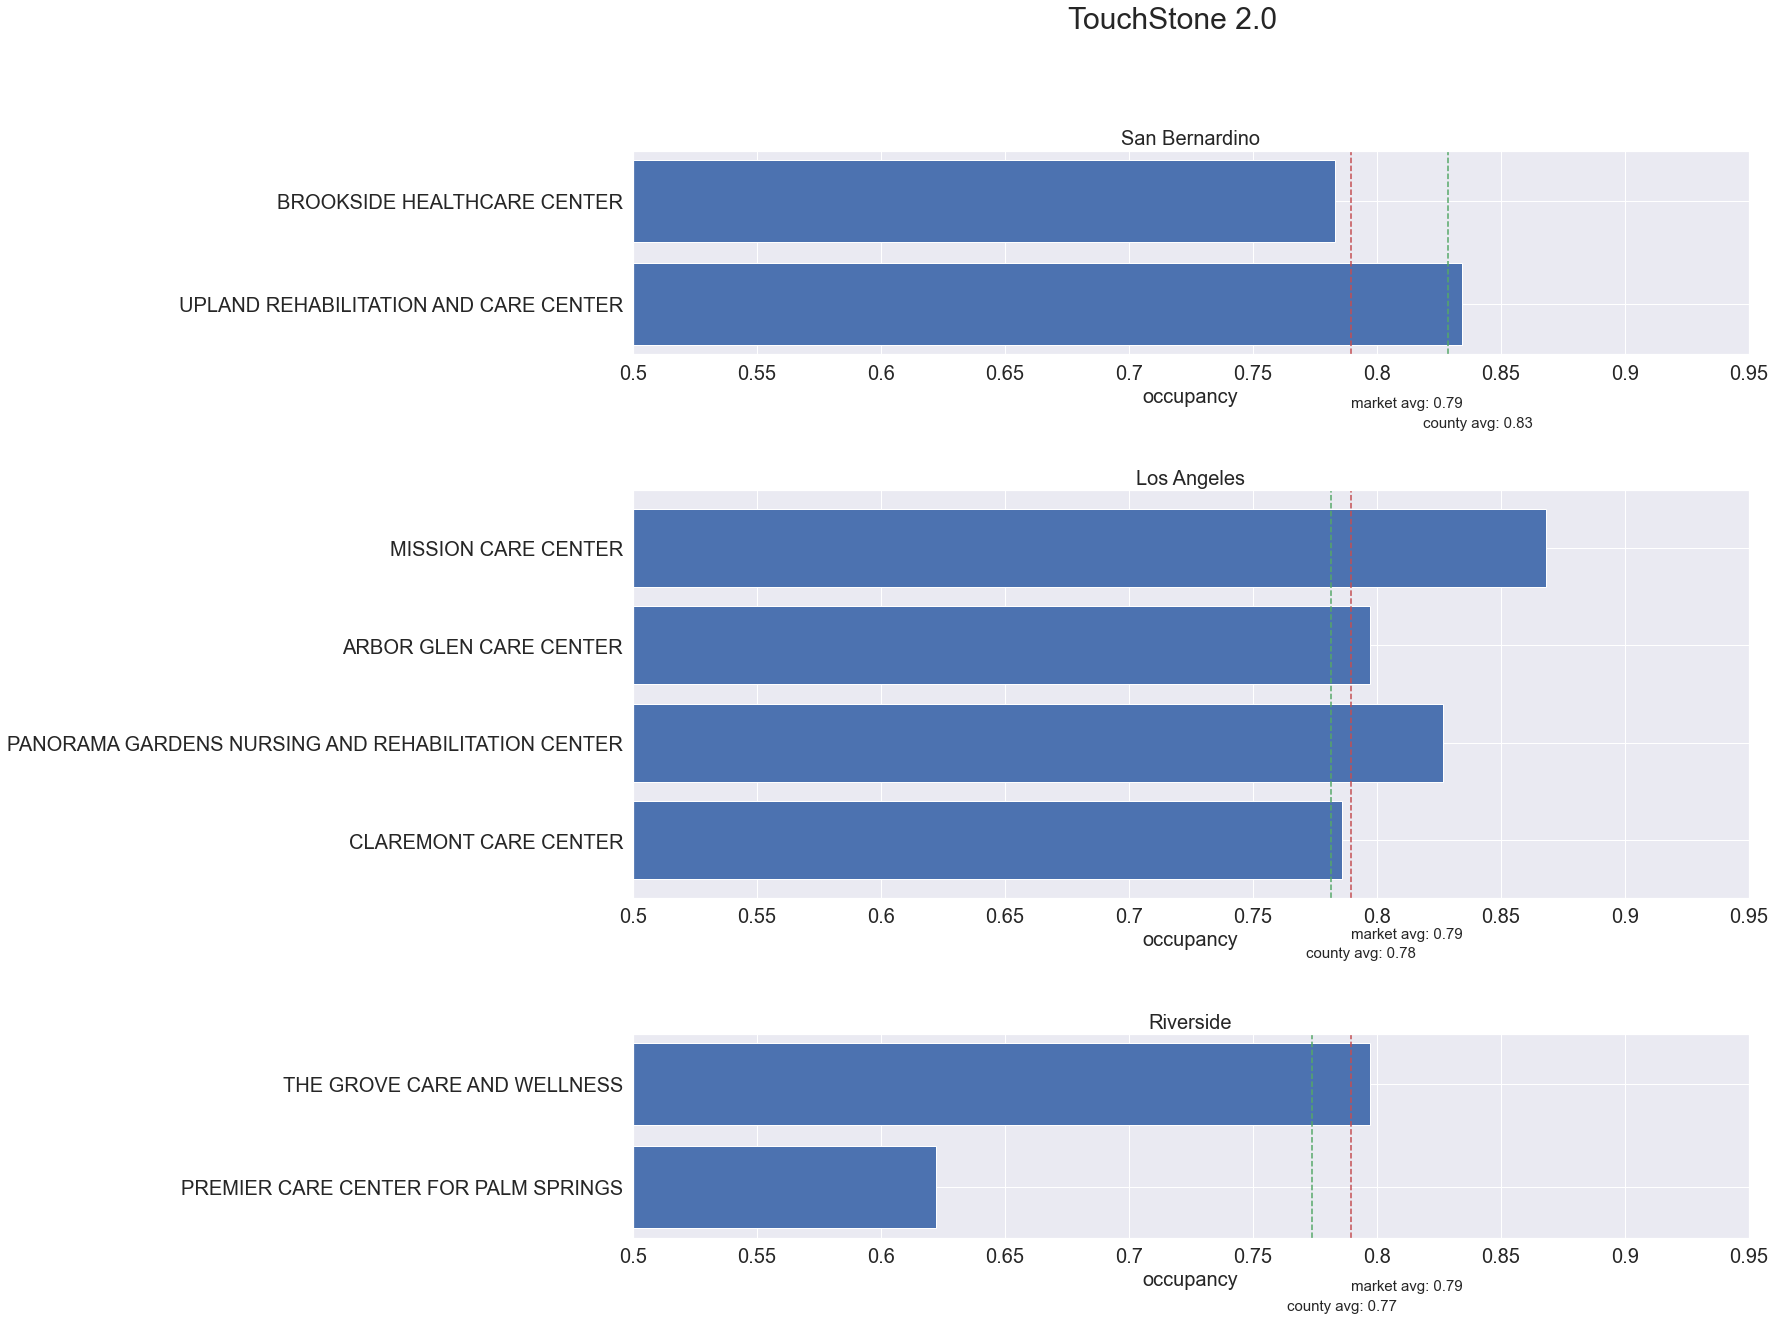

In [196]:
# for each market: 
    # counties (list of counties)
    # year
    # month

fig, axes = plt.subplots(len(counties), 1, squeeze=False,
                        gridspec_kw={'height_ratios': [1,2,1], 'hspace':0.5}) # number of counties in this market

fig.suptitle("TouchStone 2.0", fontsize=30)

for i in range(len(counties)):
    ax = axes[i][0]
    
    # calculate each county's avarage
    county_avg = df_2020[df_2020['county_name'] == counties[i]]['occupancy'].mean()
    
    df = df_touch_2020[df_touch_2020['county_name'] == counties[i]]
    n = range(0,len(df))
    ax.barh(n, df['occupancy'])
    ax.set_xlim(0.5,0.95)
    ax.set_xticklabels(np.round(np.linspace(0.5, 0.95, 10),2), fontsize=20, minor=False)
    ax.set_yticks(n)
    ax.set_yticklabels(df['provname'], fontsize=20)
    ax.set_title(counties[i], fontsize=20)
    ax.set_xlabel('occupancy', fontsize=20)
    ax.axvline(x=market_avg, linestyle='dashed', color='r')
    ax.text(market_avg, -1, f'market avg: {np.round(market_avg,2)}', fontsize=15)
    ax.axvline(x=county_avg, linestyle='dashed', color='g')
    ax.text(county_avg-0.01, -1.2, f'county avg: {np.round(county_avg,2)}', fontsize=15)

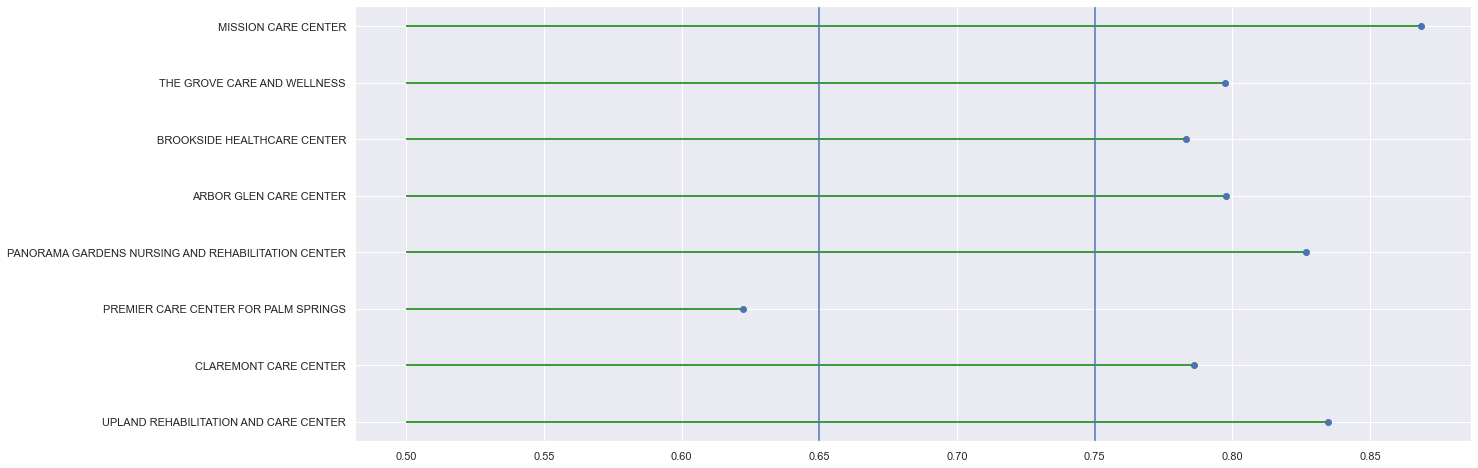

In [49]:

plt.hlines(y=range(1, len(df_touch_2020.index) + 1), xmin=0.5, xmax=df_touch_2020['occupancy'], color='green')
plt.axvline(x=0.75)  # market average
plt.axvline(x=0.65)  # county average
plt.plot(df_touch_2020['occupancy'], range(1, len(df_touch_2020.index) + 1), "o")
plt.yticks(range(1, len(df_touch_2020.index) + 1), df_touch_2020['provname']);

In [28]:
df_touch_2020

,provnum,year,month,provname,city,state,county_name,county_fips,cy_qtr,workdate,...,hrs_medaide_ctr,day,day_name,is_weekend,bedcert,region,market,cluster,occupancy,ensign
1,055374,2020,4,UPLAND REHABILITATION AND CARE CENTER,UPLAND,CA,San Bernardino,71.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,206,California,Touchstone 2.0,The Tough Ones,0.834634,True
4,055394,2020,4,CLAREMONT CARE CENTER,POMONA,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,99,California,Touchstone 2.0,The Empire,0.785961,True
7,056328,2020,4,PREMIER CARE CENTER FOR PALM SPRINGS,PALM SPRINGS,CA,Riverside,65.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,99,California,Touchstone 2.0,The Empire,0.622496,True
10,056337,2020,4,PANORAMA GARDENS NURSING AND REHABILITATION CE...,PANORAMA CITY,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,151,California,Touchstone 2.0,The Tough Ones,0.826640,True
13,056360,2020,4,ARBOR GLEN CARE CENTER,GLENDORA,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,98,California,Touchstone 2.0,The Tough Ones,0.797543,True
16,056372,2020,4,BROOKSIDE HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,97,California,Touchstone 2.0,The Empire,0.783123,True
19,555613,2020,4,THE GROVE CARE AND WELLNESS,RIVERSIDE,CA,Riverside,65.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,38,California,Touchstone 2.0,The Empire,0.797224,True
22,555796,2020,4,MISSION CARE CENTER,ROSEMEAD,CA,Los Angeles,37.0,2020Q2,2020-04-01,...,0.0,1,Wednesday,False,59,California,Touchstone 2.0,The Tough Ones,0.868426,True
